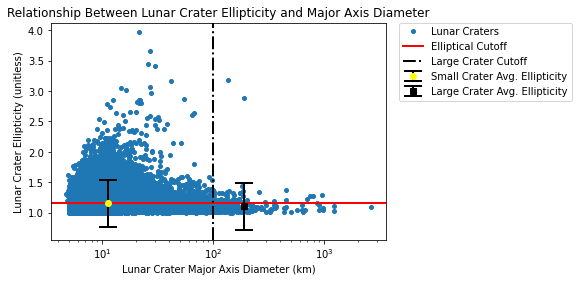

In [1]:
#-------------------------- Function Library Imports ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#------------------------- Data Imports and Cleaning ---------------------------
# Import data
csvLink = "https://raw.githubusercontent.com/lillyosaurus/lunarCraterSizeAndShape/main/AstroStats_Robbins_Moon.csv"
asteroidDataRaw=pd.read_csv(csvLink, sep=',')

# Clean data by only using craters whose ellipticity and diameter are both > 0
asteroidData = asteroidDataRaw[(asteroidDataRaw["DIAM_ELLI_ELLIP_IMG"] >= 0) & \
    (asteroidDataRaw["DIAM_ELLI_MAJOR_IMG"] > 0)]
# Use drop na to remove remaining invalid values
asteroidData = asteroidDataRaw.dropna(0, subset=["DIAM_ELLI_ELLIP_IMG", "DIAM_ELLI_MAJOR_IMG"])

#------------------------ Define Cut Off Values --------------------------------
# Crater ellipticity greater than this number are "elliptical" craters
ELLIPTIC_CUTOFF_ELLIP = 1.16
# Crater diameters (km) greater than this number are "large" craters
LARGE_CRATER_CUTOFF = 100

#------------------------ Functions kept to show process -----------------------
def plot_circle_size_freq(df, bins):
    # Graph of size-frequency of all circular craters (defined having an ellipticity below ELLIPTIC_CUTOFF_ELLIP)
    plt.figure()
    sns.histplot(df["DIAM_CIRC_IMG"], bins=bins, log_scale=True, linewidth=0.5, stat='density', color='#994F00')
    plt.xlabel("Diameter of the circular craters from an circular fit (km)")
    plt.ylabel("Frequency")
    plt.title("Size-Frequency of Circular Lunar Craters")

    # Alternative version of above without seaborn
    # plt.hist(df["DIAM_CIRC_IMG"], bins=50)
    # plt.xscale("log")

def plot_small_ellip_freq(df, bins):
    # Graph of only the small craters' ellipticity frequency
    plt.figure()
    plt.hist(df["DIAM_ELLI_ELLIP_IMG"], bins=bins)
    plt.xlabel("Ellipticity of the small craters (km)")
    plt.ylabel("Frequency")
    plt.title("Ellipticity Frequency of Small Lunar Craters")

def plot_large_ellip_freq(df, bins):
    # Graph of only large craters' ellipticity frequency
    plt.figure()
    plt.hist(df["DIAM_ELLI_ELLIP_IMG"], bins=bins)
    plt.xlabel("Ellipticity of the large craters (km)")
    plt.ylabel("Frequency")
    plt.title("Ellipticity Frequency of Large Lunar Craters")

def plot_small_size_ellip(df, markersize):
    # Graph of only small craters' diameter (major ellipse diameter) vs. ellipticity
    plt.figure()
    plt.plot(df["DIAM_ELLI_MAJOR_IMG"], df["DIAM_ELLI_ELLIP_IMG"], 'o', markersize=markersize)
    plt.axhline(y=ELLIPTIC_CUTOFF_ELLIP, color='r', linestyle='--')
    plt.xscale("log")
    plt.xlabel("Lunar Crater Major Axis Diameter (km)")
    plt.ylabel("Lunar Crater Ellipticity (unitless)")
    plt.title("Relationship Between Small Lunar Crater Ellipticity and Major Axis Diameter")
    plt.legend(["Lunar Craters", "Elliptical Cutoff"])

def plot_large_size_ellip(df, markersize):
    # Graph of only small craters' diameter (major ellipse diameter) vs. ellipticity
    plt.figure()
    plt.plot(df["DIAM_ELLI_MAJOR_IMG"], df["DIAM_ELLI_ELLIP_IMG"], 'o', markersize=markersize)
    plt.axhline(y=ELLIPTIC_CUTOFF_ELLIP, color='r', linestyle='--')
    plt.xscale("log")
    plt.xlabel("Lunar Crater Major Axis Diameter (km)")
    plt.ylabel("Lunar Crater Ellipticity (unitless)")
    plt.title("Relationship Between Large Lunar Crater Ellipticity and Major Axis Diameter")
    plt.legend(["Lunar Craters", "Elliptical Cutoff"])

def random_asteroid_sample(frac_samples):
    # Create dataframe with random sampling of the original Robbins' database
    randomAsteroidData = asteroidData.sample(frac=frac_samples, axis='index')
    return randomAsteroidData

#---------------------- Functions used in current analysis ---------------------
def define_subset_dataframes(df):
    # Define dataframes of craters by shape
    circleCraters = df[df["DIAM_ELLI_ELLIP_IMG"] <= ELLIPTIC_CUTOFF_ELLIP]
    ellipseCraters = df[df["DIAM_ELLI_ELLIP_IMG"] > ELLIPTIC_CUTOFF_ELLIP]

    # Define dataframes of craters by size
    smallCraters = df[df["DIAM_ELLI_MAJOR_IMG"] <= LARGE_CRATER_CUTOFF]
    largeCraters = df[df["DIAM_ELLI_MAJOR_IMG"] > LARGE_CRATER_CUTOFF]
    return [circleCraters, ellipseCraters, smallCraters, largeCraters]

def calc_mean_std(df, col):
    # A function that calculates the mean and standard deviation of a specific variable for a dataframe
    avg = np.mean(df[col])
    stddev = np.std(df[col])
    return [avg, stddev]

def plot_size_ellip(df, markersize):
    # Graph of crater diameter (major ellipse diameter) vs. ellipticity
    plt.figure()
    # Plot the data
    plt.plot(df["DIAM_ELLI_MAJOR_IMG"], df["DIAM_ELLI_ELLIP_IMG"], 'o', markersize=markersize)
    # Plot the cuttoff value lines
    plt.axhline(y=ELLIPTIC_CUTOFF_ELLIP, color="r", linestyle='-', linewidth=2)
    plt.axvline(x=LARGE_CRATER_CUTOFF, color='k', linestyle='-.', linewidth=2)

    # Adjust plot formatting
    plt.xscale("log")
    plt.xlabel("Lunar Crater Major Axis Diameter (km)")
    plt.ylabel("Lunar Crater Ellipticity (unitless)")
    plt.title("Relationship Between Lunar Crater Ellipticity and Major Axis Diameter")
    plt.legend(["Lunar Craters", "Elliptical Cutoff", "Large Crater Cutoff"])

def plot_small_large_error(numStdDevs=1):
    # A function that plots the mean ellipticity and standard deviation for small and large craters
    # This function is designed to plot on top of the plot generated by plot_size_ellip()

    # Calculate the mean and standard deviation values for the diameter and the ellipticity
    smallDiamStats = calc_mean_std(smallCraters, "DIAM_ELLI_MAJOR_IMG")
    smallEllipStats = calc_mean_std(smallCraters, "DIAM_ELLI_ELLIP_IMG")
    largeDiamStats = calc_mean_std(largeCraters, "DIAM_ELLI_MAJOR_IMG")
    largeEllipStats = calc_mean_std(largeCraters, "DIAM_ELLI_ELLIP_IMG")

    # Plot the mean ellipticity for small craters with error bars of 3 times the standard deviation
    # the x value is the mean diameter for small craters
    plt.errorbar(smallDiamStats[0], smallEllipStats[0], yerr=(numStdDevs*smallEllipStats[1]), \
        fmt='o',ecolor = 'black',color='yellow', zorder=3, capsize=9, elinewidth=2, capthick=2)

    # Plot the mean ellipticity for large craters with error bars of 3 times the standard deviation
    # the x value is the mean diameter for large craters
    plt.errorbar(largeDiamStats[0], largeEllipStats[0], yerr=numStdDevs*smallEllipStats[1], \
        fmt='s',ecolor = 'black',color='black', zorder=3, capsize=9, elinewidth=2, capthick=2)

    # Add a legend that explains what each of the plotted values are
    plt.legend(["Lunar Craters", "Elliptical Cutoff", "Large Crater Cutoff", "Small Crater Avg. Ellipticity", "Large Crater Avg. Ellipticity"], bbox_to_anchor=(1.04,1), borderaxespad=0)



#-----------------------------    Past analysis    -----------------------------
# Note, these have been moved about the "define_subset_dataframes" function call for code readibility, 
# and will run if moved underneath the function call below!

## Calling plotting functions
# plot_circle_size_freq(df=circleCraters, bins=50)

# plot_small_ellip_freq(df=smallCraters, bins=50)
# plot_large_ellip_freq(df=largeCraters, bins=50)

# plot_small_size_ellip(df=smallCraters, markersize=0.5)
# plot_large_size_ellip(df=largeCraters, markersize=0.5)

#use random sampling to randomly downsample the data
#randomAsteroidData = random_asteroid_sample(frac_samples=0.1)

#--------------------------      Current analysis    ---------------------------

#generate subset dataframes
[circleCraters, ellipseCraters, smallCraters, largeCraters] = define_subset_dataframes(df=asteroidData)

# Call plotting functions
plot_size_ellip(df=asteroidData, markersize=4)
plot_small_large_error(numStdDevs=3)

#display the plot
plt.show()